In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


## Exploratory Data Analysis

In [3]:
data.shape

(61878, 95)

In [4]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [5]:
sum(data.isnull().values) # Each column has 0 null values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

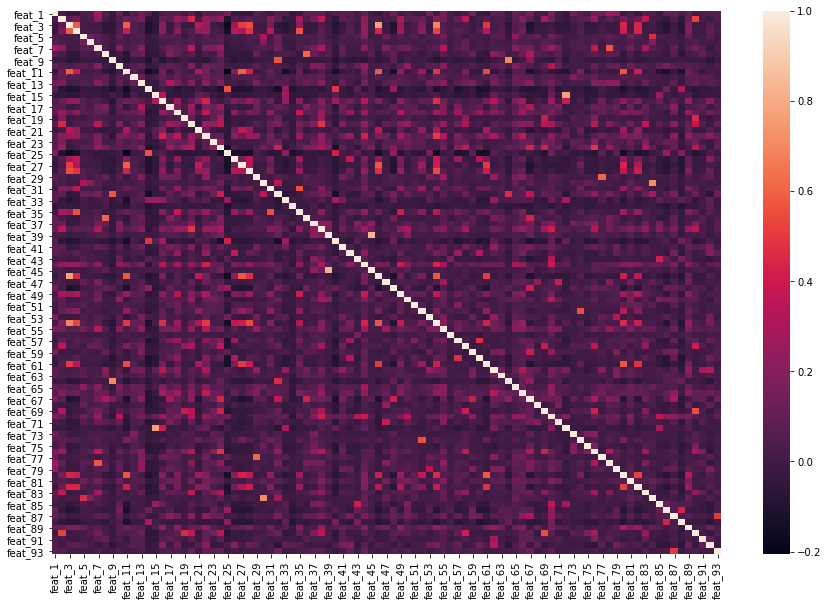

In [6]:
# There are some correlated features
features = data.iloc[:,1:94]
plt.figure(figsize = (15,10))
sns.heatmap(features.corr());

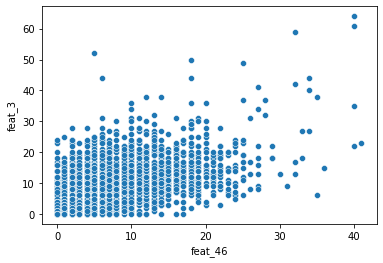

In [7]:
sns.scatterplot(x='feat_46',y='feat_3',data=features);

In [8]:
# No duplicate product/case
sum(data.duplicated())

0

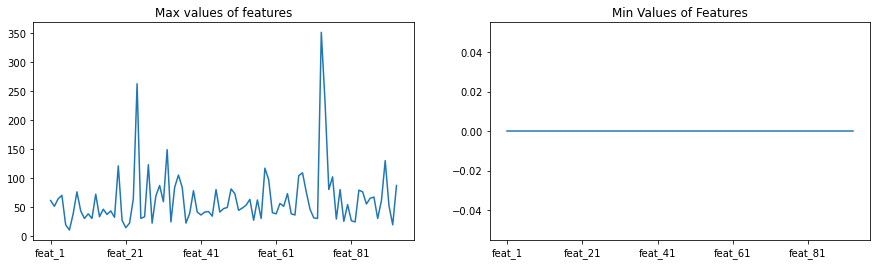

In [9]:
fig = plt.figure(figsize = (15,4))
ax1 = fig.add_subplot(1,2,1)
features.max().plot()
plt.title('Max values of features')

ax2 = fig.add_subplot(1,2,2)
features.min().plot()
plt.title('Min Values of Features');

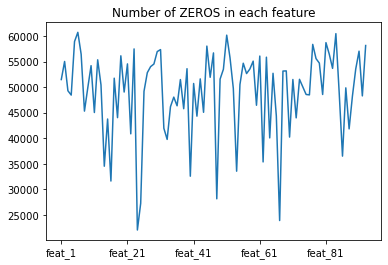

In [35]:
(features==0).sum().plot()
#plt.xticks(ticks = range(1,94), labels = (features==0).sum().index,rotation = 90)
plt.title('Number of ZEROS in each feature');

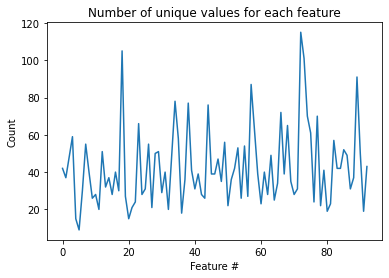

In [11]:
unique_feat_vals = []
for i in range(1,94):
    unique_feat_vals.append(len(features[f'feat_{i}'].value_counts()))

plt.plot(unique_feat_vals)
plt.xlabel('Feature #'); plt.ylabel('Count')
plt.title('Number of unique values for each feature');

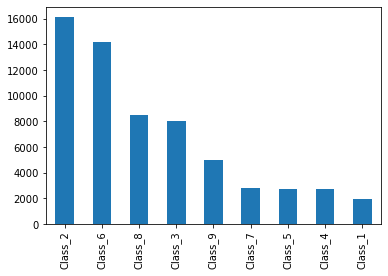

In [12]:
# Definite class imbalance
data['target'].value_counts().plot.bar();

## Normalization of Features (center and rescale)

In [13]:
normalized_features = (features-features.mean())/features.std()
X = normalized_features

## PCA

In [14]:
pca = PCA(n_components = None).fit(X)

In [41]:
#pca.components_

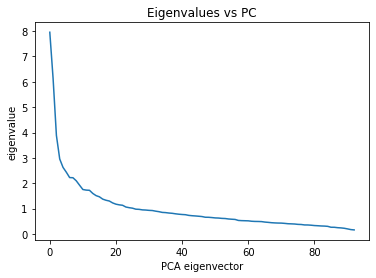

In [16]:
# Eigenvalues
plt.plot(pca.explained_variance_);
plt.title('Eigenvalues vs PC');
plt.ylabel('eigenvalue');
plt.xlabel('PCA eigenvector');

First 3 PVE: [ 8.55569446 15.14274324 19.31981255]


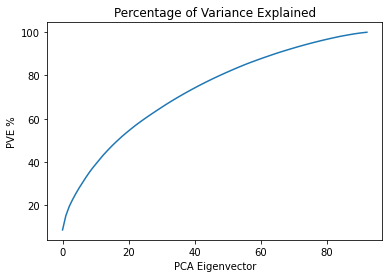

In [17]:
plt.plot(pca.explained_variance_ratio_.cumsum()*100);
plt.title('Percentage of Variance Explained');
plt.ylabel('PVE %')
plt.xlabel('PCA Eigenvector');
print('First 3 PVE:',(pca.explained_variance_ratio_.cumsum()*100)[:3])

In [18]:
new_features = np.matmul(pca.components_,normalized_features.T).T

## First 3 PCA Visualization

In [19]:
colors = {'Class_1':'cyan', 'Class_2':'blue', 'Class_3':'green', 'Class_4':'black',
         'Class_5': 'yellow', 'Class_6':'orange', 'Class_7': 'purple', 'Class_8': 'red',
         'Class_9': 'silver'}

In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


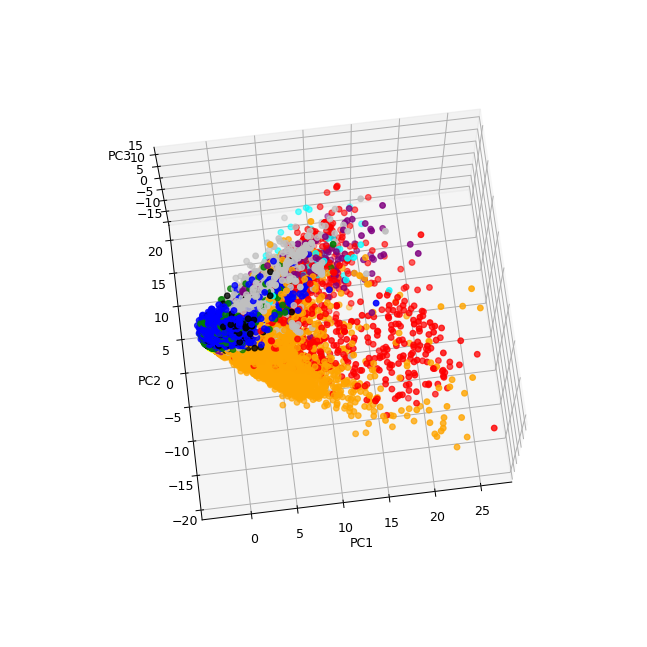

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=new_features['feat_1'],
           ys=new_features['feat_2'],
           zs=new_features['feat_3'], c = data['target'].apply(lambda x: colors[x]));
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier(oob_score = True)

In [50]:
model.fit(normalized_features,data['target'])

RandomForestClassifier(oob_score=True)

In [51]:
model.oob_score_

0.8081062736352177

In [52]:
model.oob_decision_function_

array([[0.        , 0.        , 0.        , ..., 0.02702703, 0.        ,
        0.02702703],
       [0.04651163, 0.06976744, 0.        , ..., 0.04651163, 0.6744186 ,
        0.06976744],
       [0.61290323, 0.03225806, 0.        , ..., 0.09677419, 0.03225806,
        0.22580645],
       ...,
       [0.13157895, 0.        , 0.05263158, ..., 0.        , 0.05263158,
        0.76315789],
       [0.09375   , 0.03125   , 0.        , ..., 0.        , 0.0625    ,
        0.46875   ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02857143,
        0.77142857]])

In [53]:
model.feature_importances_

array([0.00715438, 0.0039124 , 0.01244558, 0.01046772, 0.00200444,
       0.00094225, 0.00314415, 0.01456983, 0.01293352, 0.00412554,
       0.04035043, 0.00239047, 0.00608772, 0.03115602, 0.02556992,
       0.01161112, 0.00899895, 0.00611905, 0.00483697, 0.00670152,
       0.00373949, 0.00613557, 0.00331027, 0.01977877, 0.02925991,
       0.02632774, 0.01089738, 0.00364261, 0.00455596, 0.00973189,
       0.00189146, 0.01301706, 0.01176294, 0.04492555, 0.00763061,
       0.01957763, 0.005928  , 0.00765291, 0.01146787, 0.03015781,
       0.00727572, 0.0237881 , 0.0134365 , 0.00532426, 0.00384689,
       0.00746574, 0.00819739, 0.01809061, 0.00319557, 0.00800942,
       0.00109129, 0.00291903, 0.0107255 , 0.01122464, 0.00520462,
       0.0066423 , 0.01074018, 0.00679711, 0.00918634, 0.03681632,
       0.00795598, 0.01967455, 0.00287741, 0.01488827, 0.00347453,
       0.00692362, 0.02306435, 0.01199222, 0.01456927, 0.01018797,
       0.00837796, 0.01489193, 0.0049683 , 0.00509246, 0.01548

<IPython.core.display.Javascript object>


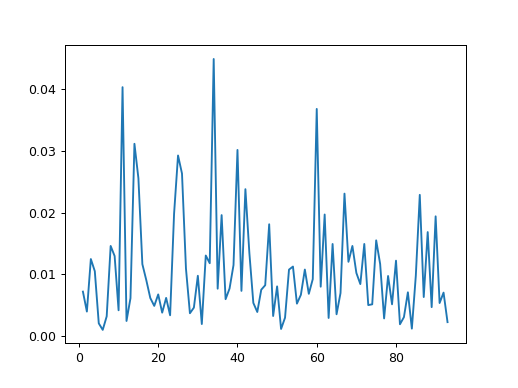

In [54]:
fig = plt.figure()
plt.plot(list(range(1,94)), model.feature_importances_.tolist());

Feature ranking:
1. feature 33 (0.044926)
2. feature 10 (0.040350)
3. feature 59 (0.036816)
4. feature 13 (0.031156)
5. feature 39 (0.030158)
6. feature 24 (0.029260)
7. feature 25 (0.026328)
8. feature 14 (0.025570)
9. feature 41 (0.023788)
10. feature 66 (0.023064)
11. feature 85 (0.022865)
12. feature 23 (0.019779)
13. feature 61 (0.019675)
14. feature 35 (0.019578)
15. feature 89 (0.019377)
16. feature 47 (0.018091)
17. feature 87 (0.016821)
18. feature 74 (0.015484)
19. feature 71 (0.014892)
20. feature 63 (0.014888)
21. feature 7 (0.014570)
22. feature 68 (0.014569)
23. feature 42 (0.013437)
24. feature 31 (0.013017)
25. feature 8 (0.012934)
26. feature 2 (0.012446)
27. feature 79 (0.012179)
28. feature 67 (0.011992)
29. feature 32 (0.011763)
30. feature 75 (0.011641)
31. feature 15 (0.011611)
32. feature 38 (0.011468)
33. feature 53 (0.011225)
34. feature 26 (0.010897)
35. feature 56 (0.010740)
36. feature 52 (0.010725)
37. feature 3 (0.010468)
38. feature 69 (0.010188)
39. feat

<IPython.core.display.Javascript object>


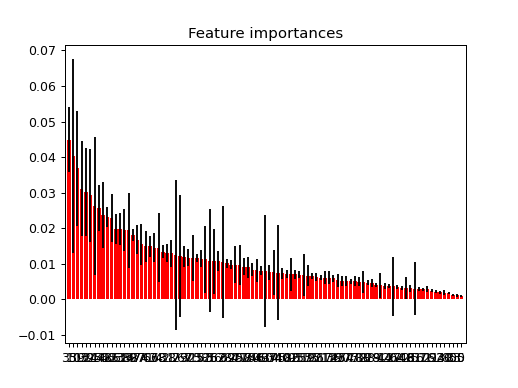

In [55]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [28]:
sklearn.metrics.confusion_matrix(data['target'].to_numpy(), model.predict(new_features))

array([[ 1929,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0, 16122,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,  8004,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,  2691,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,  2739,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0, 14135,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,  2839,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,  8464,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,  4955]])

In [29]:
probs = model.predict_proba(new_features)

In [30]:
pd.DataFrame(probs)

,0,1,2,3,4,5,6,7,8
0,0.67,0.00,0.00,0.00,0.00,0.32,0.01,0.00,0.00
1,0.69,0.04,0.03,0.02,0.02,0.08,0.05,0.05,0.02
2,0.79,0.05,0.02,0.01,0.01,0.00,0.02,0.04,0.06
3,0.95,0.01,0.00,0.00,0.00,0.01,0.00,0.03,0.00
4,0.81,0.01,0.01,0.00,0.00,0.08,0.02,0.05,0.02
...,...,...,...,...,...,...,...,...,...
61873,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.97
61874,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.93
61875,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
61876,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.04,0.94


In [61]:
testing_data.shape

(144368, 94)

In [75]:
testing_data = pd.read_csv("test.csv")

In [76]:
test_features = testing_data.iloc[:,1:94]

In [77]:
test_normalized_features = (test_features-test_features.mean())/test_features.std()
X = test_normalized_features

In [78]:
probs_test = model.predict_proba(test_normalized_features)

In [79]:
probs_test_df = pd.DataFrame(probs_test)

In [80]:
probs_test_df.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [83]:
probs_test_df.to_csv('predictions2.csv', header = True)

In [84]:
probs_test_df

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.02,0.22,0.23,0.50,0.00,0.02,0.01,0.00,0.00
1,0.00,0.06,0.05,0.03,0.00,0.51,0.03,0.32,0.00
2,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,0.00,0.63,0.26,0.04,0.01,0.00,0.00,0.01,0.05
4,0.07,0.01,0.01,0.00,0.00,0.04,0.01,0.29,0.57
...,...,...,...,...,...,...,...,...,...
144363,0.24,0.10,0.05,0.07,0.00,0.22,0.09,0.03,0.20
144364,0.00,0.39,0.48,0.08,0.00,0.00,0.05,0.00,0.00
144365,0.01,0.47,0.38,0.10,0.00,0.01,0.03,0.00,0.00
144366,0.00,0.64,0.06,0.29,0.00,0.00,0.01,0.00,0.00
